Gaussian Naive Bayes accuracy: 0.97
Multinomial Naive Bayes accuracy: 0.57
Bernoulli Naive Bayes accuracy: 0.20
Linear Discriminant Analysis accuracy: 1.00
Quadratic Discriminant Analysis accuracy: 1.00


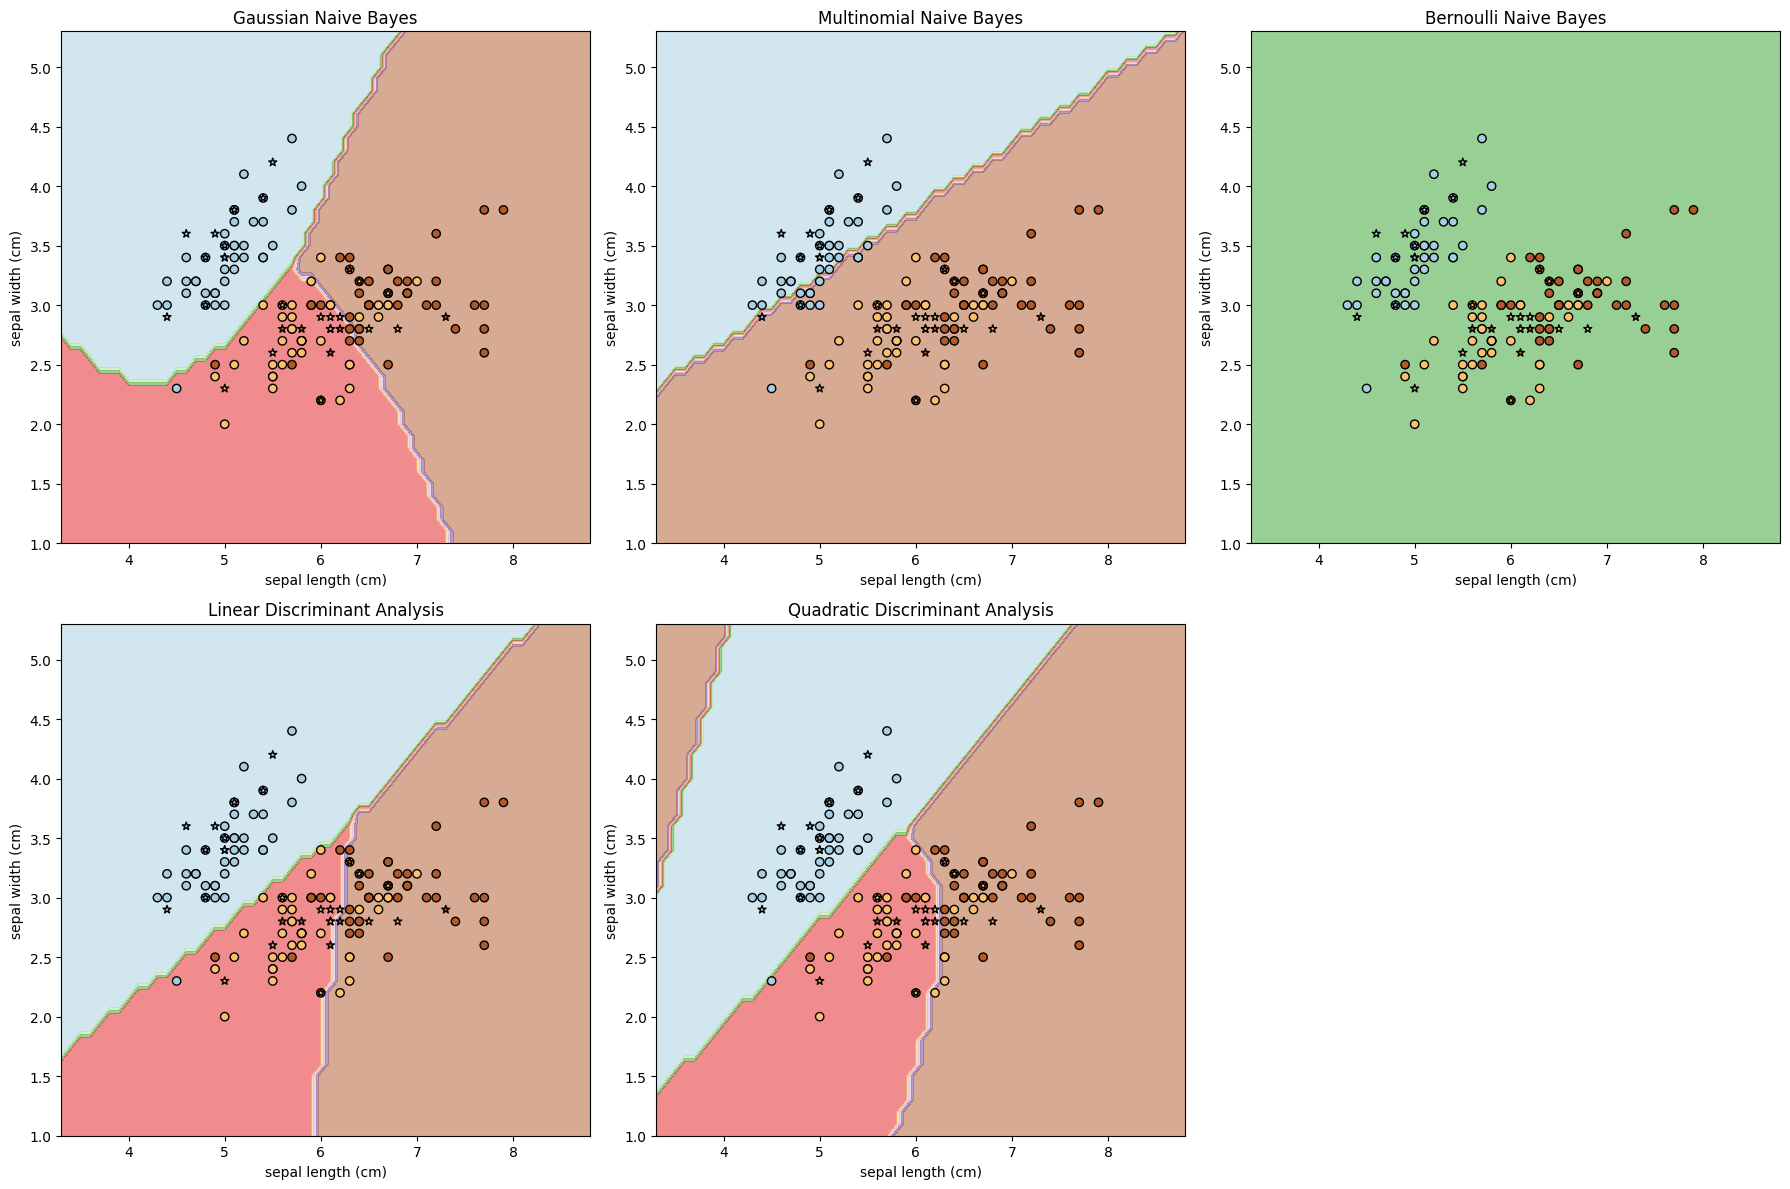

Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.69      0.69      0.69        13
           2       0.33      0.33      0.33         6

    accuracy                           0.73        30
   macro avg       0.68      0.68      0.68        30
weighted avg       0.73      0.73      0.73        30

Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.00      0.00      0.00        13
           2       0.29      1.00      0.44         6

    accuracy                           0.50        30
   macro avg       0.43      0.61      0.45        30
weighted avg       0.42      0.50      0.42        30

Classification Report for Bernoulli Naive Bayes:
               precision    recall  f1-score   support

           0       0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [3]:
# Import the necessary libraries required for data manipulation and analysis
from sklearn import datasets  # Import datasets from scikit-learn
from sklearn.model_selection import train_test_split  # Import function for splitting the dataset
from sklearn.preprocessing import StandardScaler  # Import tool for data scaling
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB  # Import various Naive Bayes classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis  # Import Linear and Quadratic Discriminant Analysis tools
from sklearn.metrics import accuracy_score  # Import metric for calculating accuracy
from sklearn.metrics import classification_report, confusion_matrix  # Import metrics for detailed analysis
import matplotlib.pyplot as plt  # Import library for data visualization
import numpy as np  # Import numerical computing library

# Load the Iris dataset from the scikit-learn library to work with a familiar dataset
iris = datasets.load_iris()  # Load the iris dataset
X = iris.data  # Get the features
y = iris.target  # Get the target values

# Split the dataset into a training set and a test set to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # Split the data

# Initialize classifiers for various algorithms to compare their performance later
gnb = GaussianNB()  # Gaussian Naive Bayes classifier
mnb = MultinomialNB()  # Multinomial Naive Bayes classifier
bnb = BernoulliNB()  # Bernoulli Naive Bayes classifier
lda = LinearDiscriminantAnalysis()  # Linear Discriminant Analysis classifier
qda = QuadraticDiscriminantAnalysis()  # Quadratic Discriminant Analysis classifier

# Define a list of classifiers to evaluate and compare their accuracies
classifiers = [('Gaussian Naive Bayes', gnb), ('Multinomial Naive Bayes', mnb),
               ('Bernoulli Naive Bayes', bnb), ('Linear Discriminant Analysis', lda),
               ('Quadratic Discriminant Analysis', qda)]

# Evaluate the performance of each classifier and print their accuracy scores
for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)  # Train the classifier
    predicted_labels = classifier.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, predicted_labels)  # Calculate accuracy
    print(f"{classifier_name} accuracy: {accuracy:.2f}")  # Print the accuracy for each classifier

# ------------------------------------------------------------------------------------------------------

# Create a 2D representation of the dataset for visualization purposes
X = iris.data[:, :2]  # Consider only the first two features for 2D plotting
y = iris.target  # Get the target values again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # Split the data

# Function to visualize decision boundaries and plot the data points
def plot_decision_boundaries(X, y, classifier, title, subplot):
    min_x1, max_x1 = X[:, 0].min() - 1, X[:, 0].max() + 1  # Define the bounds of the domain for the first feature
    min_x2, max_x2 = X[:, 1].min() - 1, X[:, 1].max() + 1  # Define the bounds of the domain for the second feature

    x1_grid = np.arange(min_x1, max_x1, 0.1)  # Create a grid for the first feature
    x2_grid = np.arange(min_x2, max_x2, 0.1)  # Create a grid for the second feature

    xx, yy = np.meshgrid(x1_grid, x2_grid)  # Create a meshgrid for plotting

    r1, r2 = xx.flatten(), yy.flatten()  # Flatten the grids to a vector
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))  # Reshape the vectors

    grid = np.hstack((r1, r2))  # Stack the vectors horizontally to create input for the model

    predictions = classifier.predict(grid)  # Predict the function values for the entire grid
    zz = predictions.reshape(xx.shape)  # Reshape the predictions back into a grid

    subplot.contourf(xx, yy, zz, cmap='Paired', alpha=0.5)  # Plot the grid of x, y, and z values as a surface

    subplot.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Paired', edgecolor='k')  # Plot the training points
    subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='Paired', marker='*', edgecolor='k')  # Plot the testing points

    subplot.title(title)  # Set the title of the subplot
    subplot.xlabel(iris.feature_names[0])  # Set the label for the x-axis
    subplot.ylabel(iris.feature_names[1])  # Set the label for the y-axis

# Prepare the figure for plotting decision boundaries
plt.figure(figsize=(18, 12))  # Set the figure size

# Plot decision boundaries for each classifier and visualize the data points
for i, (title, clf) in enumerate(classifiers, start=1):
    plt.subplot(2, 3, i)  # Create subplots
    clf.fit(X_train, y_train)  # Train the classifier
    plot_decision_boundaries(X, y, clf, title, plt)  # Plot the decision boundaries

# Show the plot with decision boundaries and data points
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

"""
Analysis of Classifier Performance:
- Bernoulli Naive Bayes and Multinomial Naive Bayes performed poorly, with Bernoulli being slightly better.
- Gaussian Naive Bayes provided reasonable class separation, but struggled with the partition between yellow and brown classes.
- Both Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) performed well, with LDA being slightly better.
"""

# ------------------------------------------------------------------------------------------------------

# Analyze the classification results and compare the accuracy scores for a comprehensive evaluation

from sklearn.metrics import classification_report, confusion_matrix  # Import necessary metrics for analysis

# Initialize an empty list to hold accuracy scores for comparison later
accuracy_scores = []

for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)  # Train the classifier
    predicted_labels = classifier.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, predicted_labels)  # Calculate accuracy
    accuracy_scores.append((classifier_name, accuracy))  # Append to the list for later comparison

    # Print the classification report for each classifier
    print(f"Classification Report for {classifier_name}:\n", classification_report(y_test, predicted_labels))

#
#Comparison of Classifier Performance:
#- The highest accuracy is achieved by Linear Discrim
